## NDT X-Ray Image Segmentation

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fft2, ifft2, fftshift

from skimage.filters import difference_of_gaussians, window

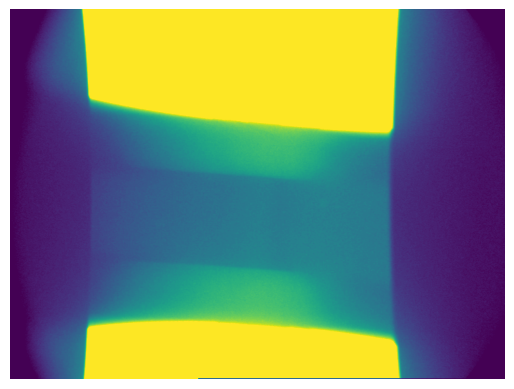

In [2]:
filepath=r'casting-x-rays/C0057_0008.png'

plt.axis("off")
img = plt.imread(filepath)

plt.imshow(img)

In [59]:
print(np.shape(img))
img.dtype

(574, 768)


dtype('float32')

## Rotate the image

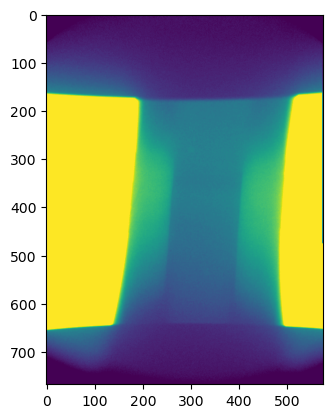

In [38]:
img=np.rot90(img,1)
plt.imshow(img)

## adaptive thresholding

(array([ 22052.,   9909.,  16073.,  25421.,  17069.,  14492.,  13025.,
         12448.,   6197.,   5917.,   6074.,   8809.,   5391.,   5434.,
          7689.,   5552.,   5301.,   5512.,   9728.,   7696.,  10705.,
         15454.,  19238.,   5795.,   3992.,   5094.,   3000.,   2909.,
          2943.,   4673.,   3319.,   3611.,   3730.,   5895.,   3958.,
          3362.,   3150.,   1518.,   1191.,    998.,   1282.,    663.,
           602.,    490.,    684.,    357.,    373.,    474.,    279.,
           284.,    277., 120743.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

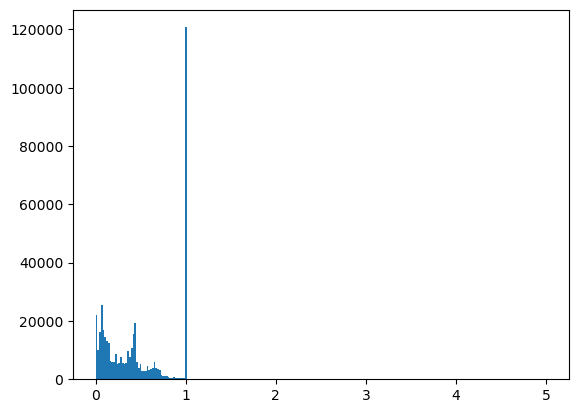

In [61]:
#img_wt = np.dot(img[...,:3],[1/3,1/3,1/3])
#img_wt = np.dot(img[...,:3],[0.299,0.587,0.114])
#img = cv2.convertScaleAbs(img)
plt.hist(img.ravel(),256,[0,5])

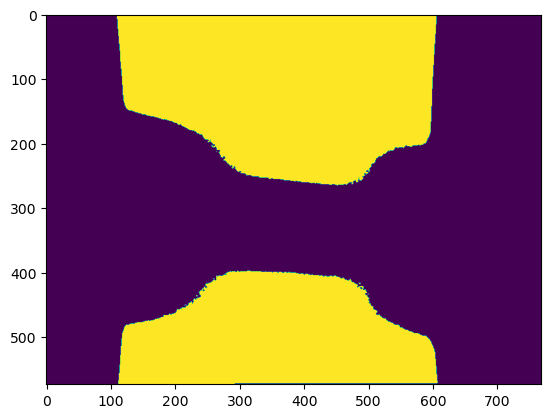

In [46]:
plt.imshow(img)

In [ ]:
threshold=0.5

img0 = plt.imread(filepath,0)
#img0 = cv2.convertScaleAbs(img0)

img = cv2.medianBlur(img0,3)
ret,th1 = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,33,2)



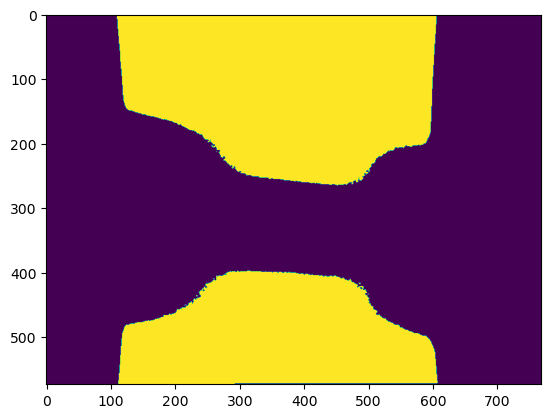

In [64]:
plt.imshow(img)

## Sobel Filter

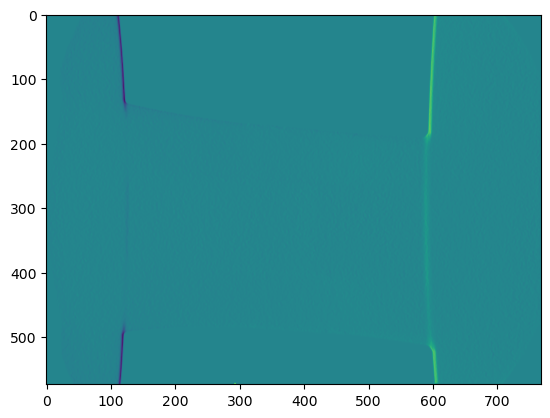

In [69]:
#horizontal Sobel filter
kernel = np.matrix(
    [[1, 0, -1],
     [2, 0, -2],
     [1, 0, -1]
    ]
)

vr_edges=cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(vr_edges)

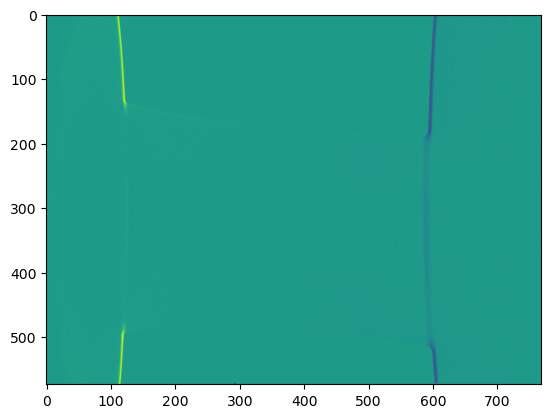

In [68]:
#vertical face left Sobel filter
kernel = np.matrix(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]
    ]
)

vl_edges=cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(vl_edges)

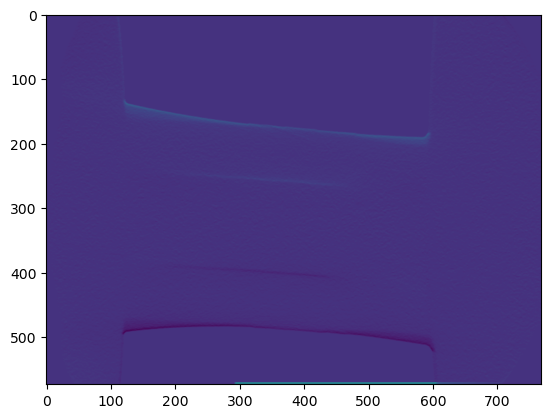

In [70]:
#horizontal face down Sobel filter
kernel = np.matrix(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]
    ]
)

hd_edges=cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(hd_edges)

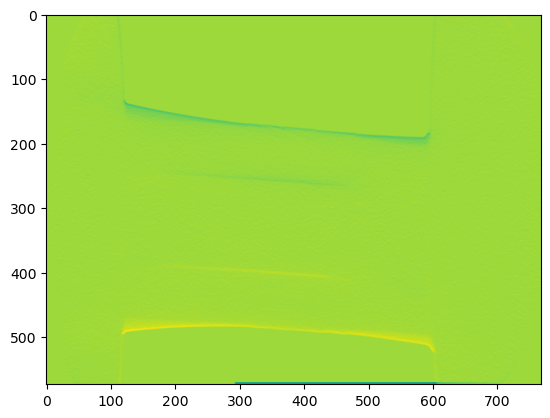

In [71]:
#horizontal face up Sobel filter
kernel = np.matrix(
    [[-1, -2,-1],
     [0, 0, 0],
     [1, 2, 1]
    ]
)

hu_edges=cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(hu_edges)

## Add images

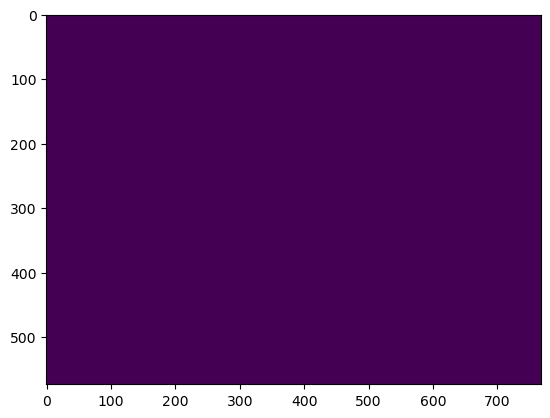

In [80]:
h_edges=cv2.add(hu_edges,hd_edges)
v_edges=cv2.add(vr_edges,vl_edges)
all_edges = cv2.add(h_edges,v_edges)

plt.imshow(v_edges)

# Stitching images

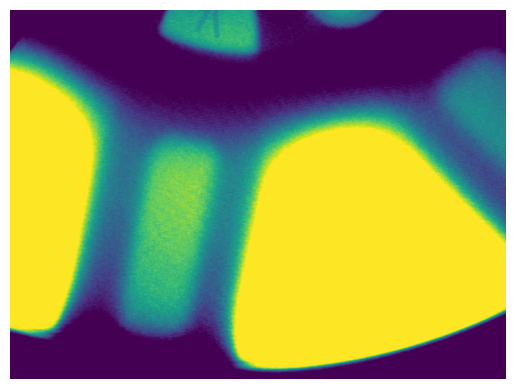

In [85]:
filepath2 = r'casting-x-rays/C0042_0002.png'

plt.axis("off")
img2 = plt.imread(filepath2)
plt.imshow(img)
plt.imshow(img2)

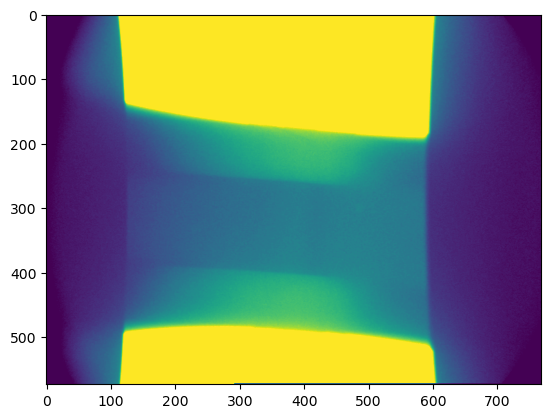

In [86]:
plt.imshow(img)

In [87]:
#split image

imgL=img[:,:150]
imgR=img[:,675:]

print(np.shape(imgL))
print(np.shape(imgR))

(574, 150)
(574, 93)


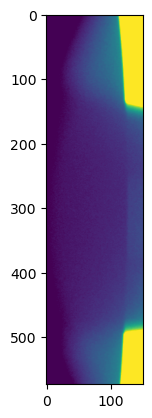

In [88]:
plt.imshow(imgL)

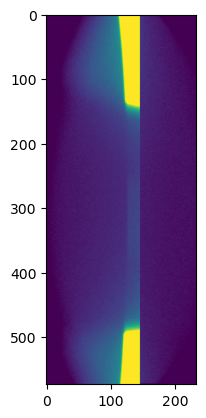

In [91]:
overlap = 10

heightL, widthL = imgL.shape
heightR, widthR = imgR.shape

stitch = np.concatenate((imgL[:,:widthL-int(overlap/2)], imgR[:,int(overlap/2):]), axis=1)
plt.imshow(stitch)

## Erosion and Dilation

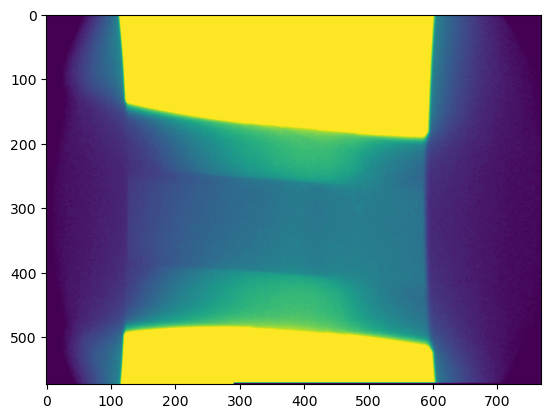

In [99]:
kernel3 = np.ones((3,3), np.uint8)
img2=cv2.erode(img,kernel3,iterations=1)
plt.imshow(img2)

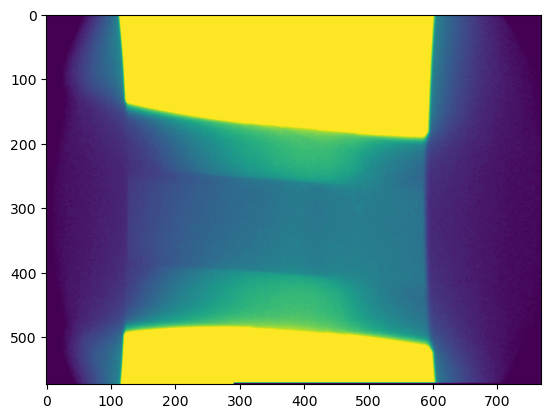

In [100]:
kernel5 = np.ones((5,5), np.uint8)
img3=cv2.dilate(img,kernel5,iterations=1)
plt.imshow(img2)

## Simple thresholding

In [14]:

img_bw = plt.imread(filepath,0)

height, width=img_bw.shape

binary = np.zeros([height,width,1],'uint8')

thresh=.3

for row in range(0,height):
    for col in range(0,width):
        if img_bw[row][col] > thresh:
            binary[row][col] = 255
    

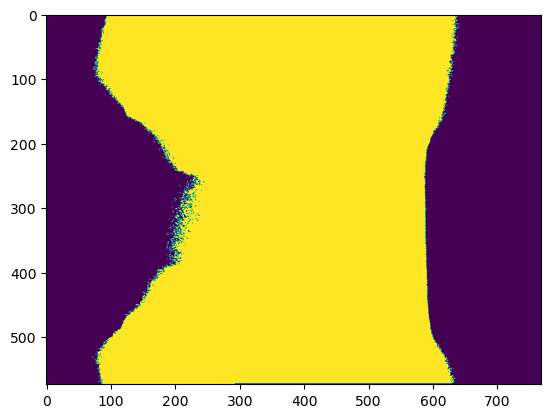

In [20]:

plt.imshow(binary)

## Adaptive thresholding

In [ ]:
thres_adapt = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 1,1 )
plt.imshow(thres_adapt)

## Contours

In [ ]:
#gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115,1 )

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2,CHAIN_APPROX_SIMPLE)

## Perform 2D FFT and Apply a Blackman filter

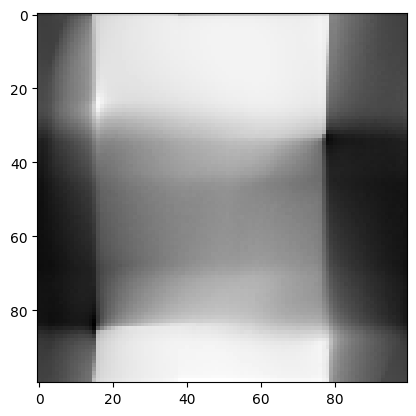

In [9]:
from scipy import signal
from scipy.fft import fft2, ifft2, fftshift

# Apply 2D FFT
fft_image = fft2(img)

feature_removal = 100

# Assuming fft_image is your 2D FFT image
#window = signal.windows.blackman(fft_image.shape[0])
window = signal.windows.blackman(feature_removal)
window_2d = np.outer(window, window) # reshape window to a 2D array

# Crop fft_image to match the shape of window_2d
fft_image_cropped = fft_image[:window_2d.shape[0], :window_2d.shape[1]]

# Inverse FFT
filtered_image = np.real(ifft2(fft_image_cropped))

# Display filtered image
plt.imshow(filtered_image, cmap='gray')
plt.show()

## Apply an FFT bandpass Blackman filter to an image 

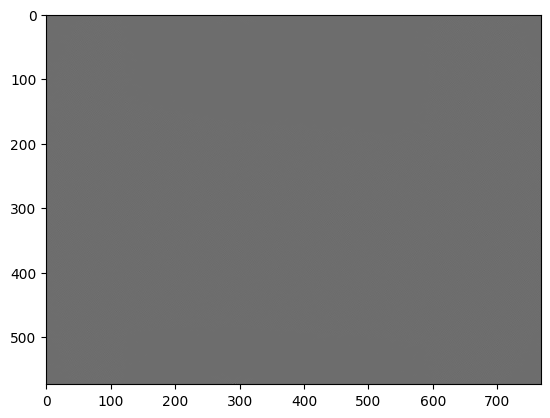

In [11]:
# Apply 2D FFT
fft_image = fft2(img)

# Define filter
low_cutoff = 0
high_cutoff = 170
filter_kernel = np.zeros_like(fft_image)
cx, cy = fft_image.shape[1] // 2, fft_image.shape[0] // 2
for i in range(fft_image.shape[0]):
    for j in range(fft_image.shape[1]):
        distance = np.sqrt((i - cy) ** 2 + (j - cx) ** 2)
        if distance > low_cutoff and distance < high_cutoff:
            filter_kernel[i, j] = 1
            
filter_kernel *= signal.windows.blackman(fft_image.shape[0])[:, np.newaxis]
filter_kernel *= signal.windows.blackman(fft_image.shape[1])[np.newaxis, :]

# Apply filter
fft_image_filtered = fft_image * filter_kernel

# Inverse FFT
filtered_image = np.real(ifft2(fft_image_filtered))

# Display filtered image
plt.imshow(filtered_image, cmap='gray')
plt.show()

In [22]:

def low_pass_blackman_filter(image, cutoff):
    # Compute 2D FFT of image
    fft_image = fft2(image)
    
    # Define filter kernel
    filter_kernel = np.ones_like(fft_image)
    cx, cy = fft_image.shape[1] // 2, fft_image.shape[0] // 2
    for i in range(fft_image.shape[0]):
        for j in range(fft_image.shape[1]):
            distance = np.sqrt((i - cy) ** 2 + (j - cx) ** 2)
            if distance < cutoff:
                filter_kernel[i, j] = 0
    filter_kernel *= signal.windows.blackman(fft_image.shape[0])[:, np.newaxis]
    filter_kernel *= signal.windows.blackman(fft_image.shape[1])[np.newaxis, :]
    
    # Apply filter
    fft_image_filtered = fft_image * filter_kernel
    
    # Inverse FFT
    filtered_image = np.real(ifft2(fft_image_filtered))

    # Display filtered image
    plt.imshow(filtered_image, cmap='gray')
    plt.show()
    
    return filtered_image

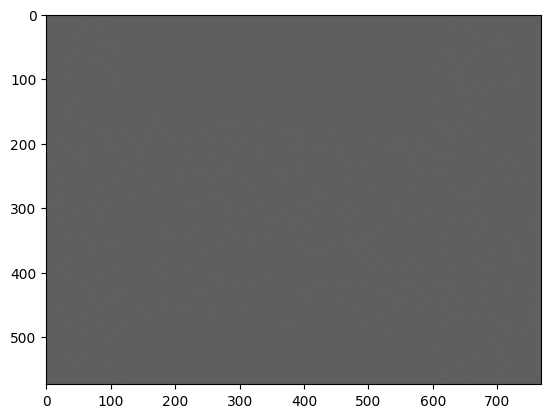

array([[ 1.54226727e-05, -1.59471529e-05,  1.71304710e-05, ...,
        -1.37210027e-05,  1.43391426e-05, -1.45330432e-05],
       [-1.69971172e-05,  1.79166673e-05, -1.90655264e-05, ...,
         1.49935931e-05, -1.55363687e-05,  1.61601347e-05],
       [ 1.81208743e-05, -1.92962325e-05,  2.05867836e-05, ...,
        -1.56144870e-05,  1.62832712e-05, -1.71111842e-05],
       ...,
       [-7.49633909e-06,  7.71574923e-06, -8.19886918e-06, ...,
         7.43422061e-06, -7.34451714e-06,  7.28740270e-06],
       [ 1.06801454e-05, -1.07952510e-05,  1.17054806e-05, ...,
        -9.88241663e-06,  1.02347585e-05, -1.00216912e-05],
       [-1.34183065e-05,  1.35055234e-05, -1.47441460e-05, ...,
         1.19349461e-05, -1.26535997e-05,  1.24386115e-05]], dtype=float32)

In [25]:
low_pass_blackman_filter(img, 10)

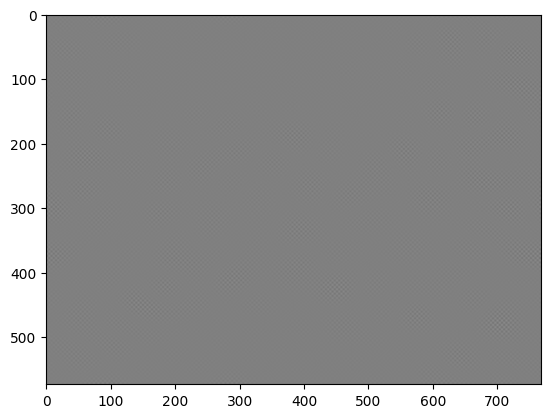

In [26]:
# Compute 2D FFT of image
fft_image = fft2(img)

# Define filter kernel
cutoff = 10
filter_kernel = np.ones_like(fft_image)
cx, cy = fft_image.shape[1] // 2, fft_image.shape[0] // 2
for i in range(fft_image.shape[0]):
    for j in range(fft_image.shape[1]):
        distance = np.sqrt((i - cy) ** 2 + (j - cx) ** 2)
        if distance > cutoff:
            filter_kernel[i, j] = 0
filter_kernel *= signal.windows.blackman(fft_image.shape[0])[:, np.newaxis]
filter_kernel *= signal.windows.blackman(fft_image.shape[1])[np.newaxis, :]

# Apply filter
fft_image_filtered = fft_image * filter_kernel

# Inverse FFT
filtered_image = np.real(ifft2(fft_image_filtered))

# Display filtered image
plt.imshow(filtered_image, cmap='gray')
plt.show()

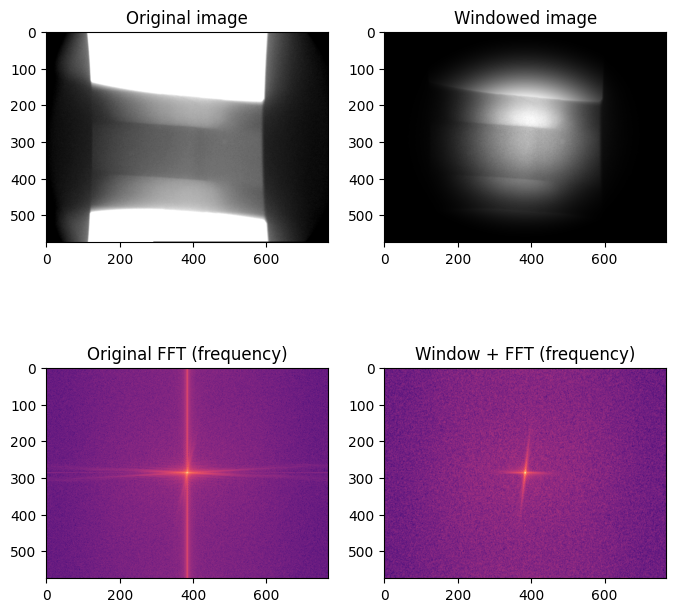

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftshift, fft
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.filters import window

#image = img_as_float(rgb2gray(astronaut()))

wimage = img * window('blackman', img.shape)

image_f = np.abs(fftshift(fft2(img)))
wimage_f = np.abs(fftshift(fft2(wimage)))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(img, cmap='gray')
ax[1].set_title("Windowed image")
ax[1].imshow(wimage, cmap='gray')
ax[2].set_title("Original FFT (frequency)")
ax[2].imshow(np.log(image_f), cmap='magma')
ax[3].set_title("Window + FFT (frequency)")
ax[3].imshow(np.log(wimage_f), cmap='magma')
plt.show()

## Testing masking frequencies in FFT

In [69]:
height, width = img.shape
print(height / 2)
print(width / 2)

287.0
384.0


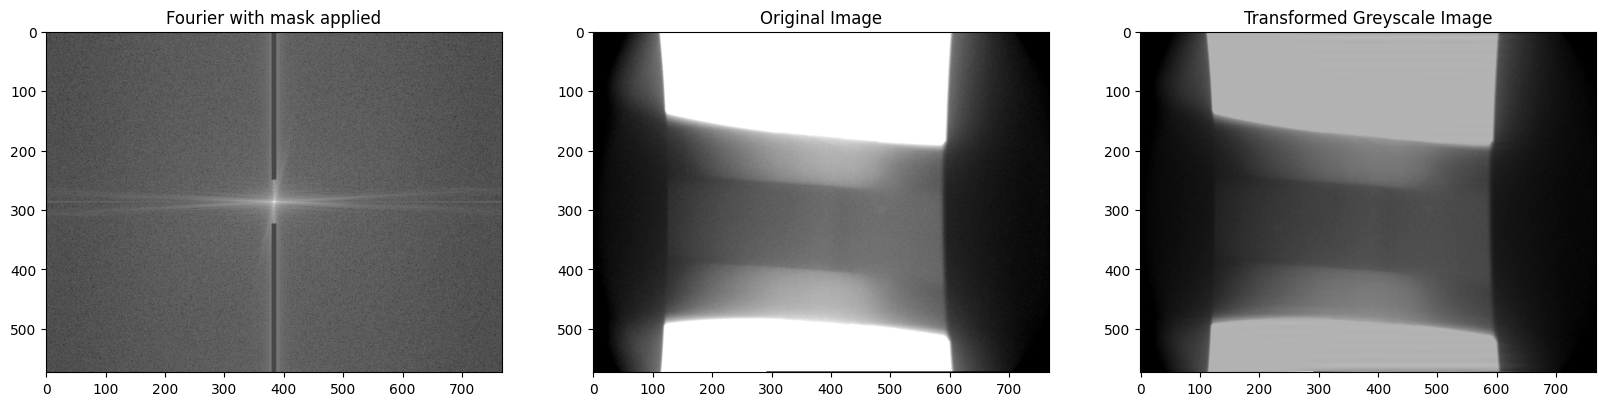

In [86]:
image_f = np.fft.fftshift(np.fft.fft2(img))

#vertical artifacts reduced
#image_f[267:307, :360] = 1
#image_f[267:307,-360:] = 1

#horizontal artifacts reduced
image_f[:250, 380:388] = 1
image_f[-250:,380:388] = 1


fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(np.log(abs(image_f)), cmap='gray')
ax[0].set_title('Fourier with mask applied')
ax[1].imshow(img, cmap = 'gray')
ax[1].set_title('Original Image');
ax[2].imshow(abs(np.fft.ifft2(image_f)), cmap='gray')
ax[2].set_title('Transformed Greyscale Image');



## Welch Spectrogram of image

Text(0, 0.5, 'Power Spectral Density')

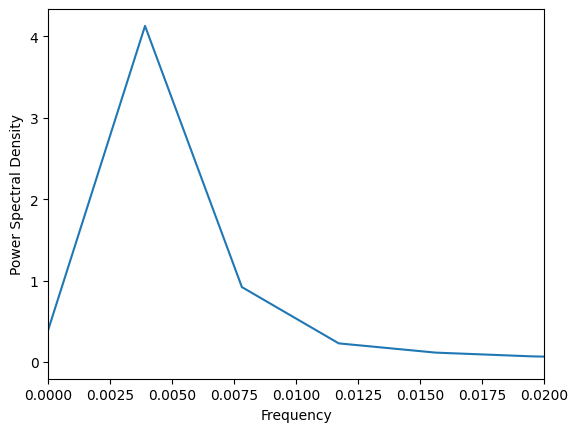

In [41]:
f, psd = signal.welch(img, nperseg=256)

# Compute average power spectral density across all rows
psd_avg = np.mean(psd, axis=0)

# Transpose psd_avg to match the shape of f
psd_avg = psd_avg.T

# Plot frequency spectrum
plt.plot(f, psd_avg.T) # Transpose psd_avg before plotting
plt.xlim(0, 0.02)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')


# Wavelet decomposition

In [ ]:
import pywt

sigma = 1;

coeffs = pywt.dwt2(img, 'haar')
cA, (cH, cV, cD) = coeffs

#FFT
fCv = fftshift(fft(cV))
(my,mx) = fCv.shape

damp = 1-np.exp(-((np.arange(0,mx)-mx/2)**2+(np.arange(0,my)-my/2)**2)/(2*sigma**2))
fCv = fCv*damp

#inverse FFT
cV = ifft(ifftshift(fCv))

#reconstruct wavelet
#recon_img = pywt.idwt2(coeffs, 'haar')
